In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning Pollution Dataset

In [18]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [19]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)
pollution.head()

(640025, 14)


,State,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI,Year
1072382,Arizona,24.416667,43.0,41,0.014417,0.037,31,1.708333,5.0,7.0,0.995833,2.3,NaN,2011
1072383,Arizona,24.416667,43.0,41,0.014417,0.037,31,1.708333,5.0,7.0,0.873684,1.4,16.0,2011
1072384,Arizona,24.416667,43.0,41,0.014417,0.037,31,1.675000,3.6,NaN,0.995833,2.3,NaN,2011
1072385,Arizona,24.416667,43.0,41,0.014417,0.037,31,1.675000,3.6,NaN,0.873684,1.4,16.0,2011
1072386,Arizona,30.750000,42.0,40,0.007917,0.020,17,2.291667,5.0,7.0,1.116667,2.4,NaN,2011


In [20]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [21]:
# Aggregating pollution by state and year

pollution_state = pollution.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.head()
pollution_state.shape

(188, 14)

In [22]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [23]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.head()

C:\Users\galav\AppData\Local\Temp\ipykernel_31064\720800954.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"


In [24]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]
heart.head()

,Year,LocationDesc,Category,Topic,Data_Value_Type,Data_Value,Break_Out_Category,Break_out
0,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Age-Standardized,9.9,Overall,Overall
1,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Crude,11.0,Overall,Overall
2,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Crude,12.5,Gender,Male
3,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Age-Standardized,11.8,Gender,Male
4,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Age-Standardized,8.3,Gender,Female


In [25]:
heart = heart.pivot_table(index=['Year', 'LocationDesc', 'Category', 'Topic', 'Break_Out_Category', 'Break_out'], columns='Data_Value_Type', values='Data_Value').reset_index()

heart

Data_Value_Type,Year,LocationDesc,Category,Topic,Break_Out_Category,Break_out,Age-Standardized,Crude
0,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Age,25-44,NaN,1.7
1,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Age,35+,NaN,7.1
2,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Age,45-64,NaN,5.8
3,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Age,65+,NaN,13.2
4,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Age,75+,NaN,15.0
...,...,...,...,...,...,...,...,...
30294,2015,Wyoming,Risk Factors,Smoking,Overall,Overall,19.7,19.1
30295,2015,Wyoming,Risk Factors,Smoking,Race,Hispanic,15.0,18.2
30296,2015,Wyoming,Risk Factors,Smoking,Race,Non-Hispanic Black,69.7,NaN
30297,2015,Wyoming,Risk Factors,Smoking,Race,Non-Hispanic White,19.0,18.1


In [26]:
heart['Break_out_Age'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Age' else np.nan, axis=1)
heart['Break_out_Gender'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Gender' else np.nan, axis=1)
heart['Break_out_Overall'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Overall' else np.nan, axis=1)
heart['Break_out_Race'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Race' else np.nan, axis=1)
heart = heart.drop(columns=["Break_out","Break_Out_Category"])
heart

Data_Value_Type,Year,LocationDesc,Category,Topic,Age-Standardized,Crude,Break_out_Age,Break_out_Gender,Break_out_Overall,Break_out_Race
0,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,1.7,25-44,NaN,NaN,NaN
1,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,7.1,35+,NaN,NaN,NaN
2,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,5.8,45-64,NaN,NaN,NaN
3,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,13.2,65+,NaN,NaN,NaN
4,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,15.0,75+,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
30294,2015,Wyoming,Risk Factors,Smoking,19.7,19.1,NaN,NaN,Overall,NaN
30295,2015,Wyoming,Risk Factors,Smoking,15.0,18.2,NaN,NaN,NaN,Hispanic
30296,2015,Wyoming,Risk Factors,Smoking,69.7,NaN,NaN,NaN,NaN,Non-Hispanic Black
30297,2015,Wyoming,Risk Factors,Smoking,19.0,18.1,NaN,NaN,NaN,Non-Hispanic White


In [27]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [28]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")
merged

,Year,LocationDesc,Category,Topic,Age-Standardized,Crude,Break_out_Age,Break_out_Gender,Break_out_Overall,Break_out_Race,...,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
0,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,1.7,25-44,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,7.1,35+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,5.8,45-64,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,13.2,65+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,Alabama,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),NaN,15.0,75+,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30294,2015,Wyoming,Risk Factors,Smoking,19.7,19.1,NaN,NaN,Overall,NaN,...,9.368617,0.036615,0.045589,43.015785,0.246926,1.193129,1.89415,0.046245,0.07881,0.713755
30295,2015,Wyoming,Risk Factors,Smoking,15.0,18.2,NaN,NaN,NaN,Hispanic,...,9.368617,0.036615,0.045589,43.015785,0.246926,1.193129,1.89415,0.046245,0.07881,0.713755
30296,2015,Wyoming,Risk Factors,Smoking,69.7,NaN,NaN,NaN,NaN,Non-Hispanic Black,...,9.368617,0.036615,0.045589,43.015785,0.246926,1.193129,1.89415,0.046245,0.07881,0.713755
30297,2015,Wyoming,Risk Factors,Smoking,19.0,18.1,NaN,NaN,NaN,Non-Hispanic White,...,9.368617,0.036615,0.045589,43.015785,0.246926,1.193129,1.89415,0.046245,0.07881,0.713755


In [29]:
merged_data = merged[merged["State"].notna()]
merged_data = merged_data.drop(columns=["State"])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21997 entries, 255 to 30298
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21997 non-null  int64  
 1   LocationDesc       21997 non-null  object 
 2   Category           21997 non-null  object 
 3   Topic              21997 non-null  object 
 4   Age-Standardized   12255 non-null  float64
 5   Crude              21651 non-null  float64
 6   Break_out_Age      9717 non-null   object 
 7   Break_out_Gender   3682 non-null   object 
 8   Break_out_Overall  1841 non-null   object 
 9   Break_out_Race     6757 non-null   object 
 10  NO2 Mean           21997 non-null  float64
 11  NO2 1st Max Value  21997 non-null  float64
 12  NO2 AQI            21997 non-null  float64
 13  O3 Mean            21997 non-null  float64
 14  O3 1st Max Value   21997 non-null  float64
 15  O3 AQI             21997 non-null  float64
 16  SO2 Mean           21997 

In [32]:
merged_data.to_csv("data/merged_data.csv",index=False)

## Outliers

<Axes: xlabel='State', ylabel='O3 AQI'>

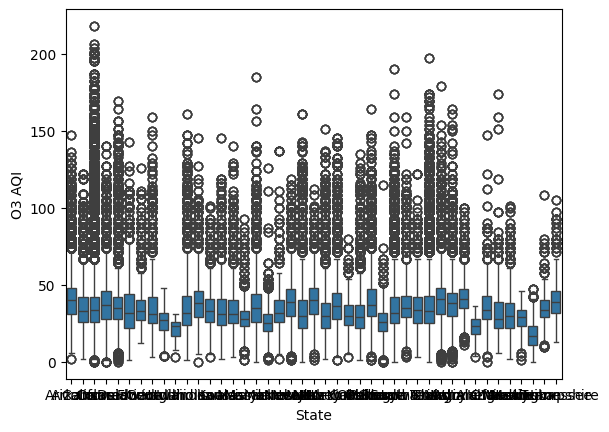

In [31]:
# plt.show()
sns.boxplot(x=pollution['State'], y=pollution['O3 AQI'])